<a href="https://colab.research.google.com/github/reply2vikas/Project-1/blob/master/Session2-VK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Not an ideal network**

In [1]:
#Import necessary libraries and Installing packages
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [1]:
#Importing necessary libraries and packages from Keras

import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
#Loading the dataset
#load_data() returns two tuples of Numpy arrays. The first tuple represents the training x-y pairs while the second
#tuple represents the testing x-y pairs.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


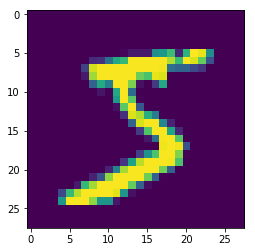

In [3]:
#Printing the Mnist image with shape (It is a tuple of integers that describe how many dimensions the tensor has
#along each axis. In the Numpy library this attribute is called shape.)
#Importing the pyplot package to show the Mnist image

print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
#Reshapping the data (Verifing that x_train.shape takes the form of (60000, 784) and x_test.shape takes the
#form of (10000, 784), where the first dimension indexes the image and the second indexes the pixel in each image
#now the intensity of the pixel is a value between 0 and 1))
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
#These MNIST images of 28×28 pixels are represented as an array of numbers whose values range from [0, 255] 
#of type uint8. But it is usual to scale the input values of neural networks to certain ranges. Here the input values 
#should be scaled to values of type float32 within the interval [0, 1]. We can achieve this transformation with the
#following lines of code:

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [6]:
#To see the effect of the transformation we can see the values before and after applying to_categorical:-
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
#In this example we will use what is known as one-hot encoding, which we have already mentioned, which consists
#of transforming the labels into a vector of as many zeros as the number of different labels, and containing the 
#value of 1 in the index that corresponds to the value of the label. Keras offers many support functions, including 
#to_categorical to perform precisely this transformation, which we can import from keras.utils-
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [8]:
#Now we will do data ready to be used in our simple model example that we are going to program in Keras in the 
#next section.
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [9]:
#Defining the Model
#Importing Activation and MaxPooling2D methos from Library/Package Keras

from keras.layers import Activation, MaxPooling2D

#The Sequential class of the Keras library is a wrapper for the sequential neural network model that Keras offers 
#and can be created in the following way:
model = Sequential() 

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(Convolution2D(1024, 3, 3, activation='relu'))
model.add(Convolution2D(2048, 3, 3, activation='relu'))
model.add(Convolution2D(10, 3, 3))

model.add(Flatten())
model.add(Activation('softmax'))

#A very useful method that Keras provides to check the architecture of our model is summary()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3

In [0]:
#Configuration of the learning process
#we are specify the following arguments in compile() method to test it on our computer:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [11]:
#Model training
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 119s 2ms/step - loss: 0.1527 - acc: 0.9522
Epoch 2/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0566 - acc: 0.9833
Epoch 3/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0393 - acc: 0.9887
Epoch 4/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0347 - acc: 0.9900
Epoch 5/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0284 - acc: 0.9919
Epoch 6/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0273 - acc: 0.9926
Epoch 7/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0229 - acc: 0.9937
Epoch 8/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0204 - acc: 0.9942
Epoch 9/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0187 - acc: 0.9946
Epoch 10/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0190 - a

In [0]:
#Model evaluation
score = model.evaluate(X_test, Y_test, verbose=0)

In [13]:
print(score)

[0.043470209123720994, 0.9905]


In [0]:
y_pred = model.predict(X_test)

In [15]:
print(y_pred[:9])
print(y_test[:9])

[[9.62709503e-19 3.62527825e-12 8.26049576e-11 9.18473739e-14
  2.07532932e-11 8.38014640e-16 2.69499952e-22 1.00000000e+00
  1.38203014e-14 3.85869967e-15]
 [3.78015220e-17 1.55144717e-11 1.00000000e+00 3.23857781e-12
  2.05581434e-16 1.96645846e-17 5.30740037e-14 1.06623141e-12
  6.13393581e-12 1.74935452e-21]
 [3.24213079e-09 9.99998212e-01 1.02915871e-08 1.87005234e-09
  6.46043006e-08 2.44479388e-08 6.09044193e-08 3.38143536e-07
  1.26172029e-06 3.48423290e-10]
 [1.00000000e+00 1.42629350e-16 4.51104079e-13 2.33329198e-12
  2.73762973e-13 9.70314037e-11 1.80536669e-10 1.53055242e-11
  3.30800057e-12 3.02869539e-14]
 [1.64742708e-09 2.52138705e-07 1.05565123e-09 2.77250614e-08
  9.68009651e-01 2.48962692e-07 5.26612105e-08 3.78797358e-06
  3.29318169e-07 3.19857076e-02]
 [1.62739633e-09 9.99965429e-01 5.77093324e-08 1.54322588e-09
  1.03431276e-07 4.23416964e-08 7.18331306e-09 2.28287518e-05
  1.15127286e-05 9.07896975e-08]
 [1.16793138e-15 1.20465356e-12 2.33579079e-13 1.90970785e